In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import linear_model 


In [2]:
df_movies = pd.read_excel('input\movies.xlsx')
df_movies.head()

,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross
0,2019-04-23 00:00:00,Avengers: Endgame,400000000,858373000,2797800564
1,2011-05-20 00:00:00,Pirates of the Caribbean: On Stranger Tides,379000000,241063875,1045663875
2,2015-04-22 00:00:00,Avengers: Age of Ultron,365000000,459005868,1403013963
3,2015-12-16 00:00:00,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2068223624
4,2018-04-25 00:00:00,Avengers: Infinity War,300000000,678815482,2048359754


In [3]:
df_movies.shape

(5891, 5)

In [4]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Data columns (total 5 columns):
Release Date         5891 non-null object
Movie                5891 non-null object
Production Budget    5891 non-null int64
Domestic Gross       5891 non-null int64
Worldwide Gross      5891 non-null int64
dtypes: int64(3), object(2)
memory usage: 230.2+ KB


In [5]:
new_df_movies = df_movies[(df_movies['Domestic Gross']!=0) & (df_movies['Worldwide Gross']!=0)].reset_index(drop = True)
new_df_movies.head()

,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross
0,2019-04-23 00:00:00,Avengers: Endgame,400000000,858373000,2797800564
1,2011-05-20 00:00:00,Pirates of the Caribbean: On Stranger Tides,379000000,241063875,1045663875
2,2015-04-22 00:00:00,Avengers: Age of Ultron,365000000,459005868,1403013963
3,2015-12-16 00:00:00,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2068223624
4,2018-04-25 00:00:00,Avengers: Infinity War,300000000,678815482,2048359754


In [6]:
new_df_movies.shape

(5310, 5)

In [7]:
X = new_df_movies.loc[:,['Production Budget']].as_matrix()

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [8]:
y = new_df_movies['Worldwide Gross'].as_matrix()

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [9]:
print(X)

[[400000000]
 [379000000]
 [365000000]
 ...
 [     6000]
 [     5000]
 [     1100]]


In [10]:
clf = linear_model.LinearRegression()

In [11]:
clf.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
# Hệ số xác định : R^2
clf.score(X,y)

0.5530785142425074

In [13]:
# Tính hệ số hồi quy:
clf.coef_

array([3.23911588])

In [14]:
# Tính sai số:
clf.intercept_

-8447946.530142143

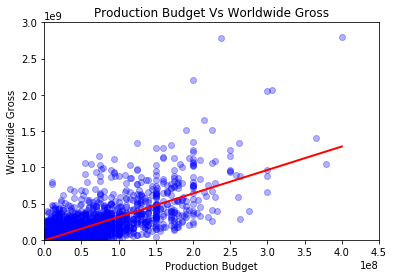

In [15]:
# Vẽ biểu đồ
plt.scatter(X,y,c='b',alpha = 0.3)
plt.title('Production Budget Vs Worldwide Gross')
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.ylim(0,3000000000) # Dời y về gốc tọa độ
plt.xlim(0,450000000) # Dời x về gốc tọa độ
# Đường thẳng hồi quy:
plt.plot(X, clf.predict(X),color ='red',linewidth=2)
plt.show()

In [16]:
new_df_movies['Worldwide Gross'].max()

2797800564

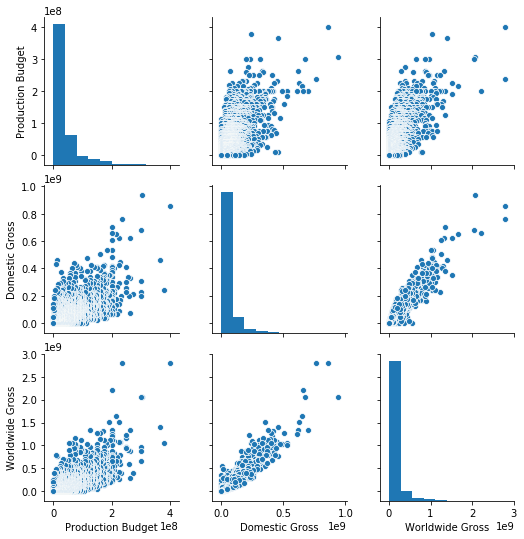

In [17]:
sb.pairplot(new_df_movies)

In [18]:
new_df_movies['Worldwide Gross'].describe()


count    5.310000e+03
mean     1.016485e+08
std      1.857740e+08
min      4.010000e+02
25%      8.200032e+06
50%      3.543844e+07
75%      1.102560e+08
max      2.797801e+09
Name: Worldwide Gross, dtype: float64

In [19]:
new_df_movies.sort_values(['Production Budget','Worldwide Gross'],ascending=[True,True]).head(10)


,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross
5309,2005-08-05 00:00:00,My Date With Drew,1100,181041,181041
5308,2005-07-13 00:00:00,Return to the Land of Wonders,5000,1338,1338
5307,1999-04-02 00:00:00,Following,6000,48482,240495
5306,Unknown,The Mongol King,7000,900,900
5305,2006-05-26 00:00:00,Cavite,7000,70071,71644
5304,2004-10-08 00:00:00,Primer,7000,424760,841926
5303,1993-02-26 00:00:00,El Mariachi,7000,2040920,2041928
5302,2012-01-13 00:00:00,Newlyweds,9000,4584,4584
5301,2008-08-14 00:00:00,The Rise and Fall of Miss Thang,10000,401,401
5300,1996-04-01 00:00:00,Bang,10000,527,527


In [24]:
predictions = clf.predict(X)
predictions

array([ 1.28719840e+09,  1.21917697e+09,  1.17382935e+09, ...,
       -8.42851183e+06, -8.43175095e+06, -8.44438350e+06])

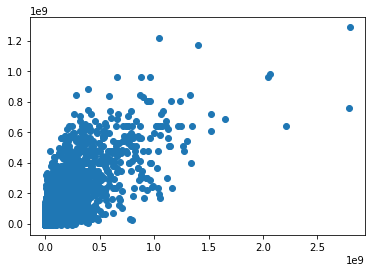

In [21]:
plt.scatter(y,predictions)

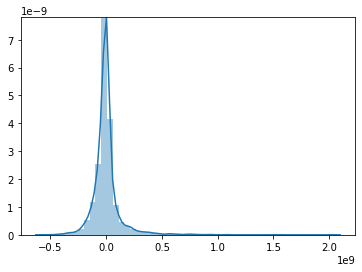

In [27]:
sb.distplot((y-predictions),bins = 50);